# Cleveland Heart Disease Dataset

This dataset is available for download [here](https://archive.ics.uci.edu/dataset/45/heart+disease).

## Getting Started
1. `cd environment`
2. `conda env create -f 7641_project_env.yml`
3. `conda activate 7641_project_env`

If that doesn't work...
1. `!pip3 install -U ucimlrepo` (if first cell does not run maybe?)

## Data Cleaning and Exploration

In [2]:
from ucimlrepo import fetch_ucirepo 
import pprint
import pandas as pd
import math
import matplotlib
import matplotlib.pyplot as plt

In [3]:
# fetch dataset 
heart_disease = fetch_ucirepo(id=45) 
  
# data (as pandas dataframes) 
X = heart_disease.data.features 
y = heart_disease.data.targets 
  
# metadata 
pp = pprint.PrettyPrinter(indent=4)
print("Heart Disease metadata")
pp.pprint(heart_disease.metadata)
print(heart_disease.metadata) 
  
# variable information 
print("Heart Disease variables")
print(heart_disease.variables) 

Heart Disease metadata
{   'abstract': '4 databases: Cleveland, Hungary, Switzerland, and the VA Long '
                'Beach',
    'additional_info': {   'citation': None,
                           'funded_by': None,
                           'instances_represent': None,
                           'preprocessing_description': None,
                           'purpose': None,
                           'recommended_data_splits': None,
                           'sensitive_data': None,
                           'summary': 'This database contains 76 attributes, '
                                      'but all published experiments refer to '
                                      'using a subset of 14 of them.  In '
                                      'particular, the Cleveland database is '
                                      'the only one that has been used by ML '
                                      'researchers to date.  The "goal" field '
                                   

From the metadata, we see that target values (stored in y) of `0` indicate an absence of heart disease and target values of `1, 2, 3, 4` indicate the presence of it.

Our data is pre-processed, so it should not have any missing values.

In [4]:
# what features do we have?
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0


In [5]:
# what do the targets look like?
y.head()

,num
0,0
1,2
2,1
3,0
4,0


In [6]:
# we have 303 paitent records
print(X.shape)
print(y.shape)

(303, 13)
(303, 1)


In [7]:
# it looks like we have a few null entries in ca and thal
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        299 non-null    float64
 12  thal      301 non-null    float64
dtypes: float64(3), int64(10)
memory usage: 30.9 KB


In [8]:
# see null rows
null_rows = X[X.isnull().any(axis=1)]
# there are only 6 rows with null valeus
null_rows.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
87,53,0,3,128,216,0,2,115,0,0.0,1,0.0,NaN
166,52,1,3,138,223,0,0,169,0,0.0,1,NaN,3.0
192,43,1,4,132,247,1,2,143,1,0.1,2,NaN,7.0
266,52,1,4,128,204,1,0,156,1,1.0,2,0.0,NaN
287,58,1,2,125,220,0,0,144,0,0.4,2,NaN,7.0
302,38,1,3,138,175,0,0,173,0,0.0,1,NaN,3.0


In this dataset, thal: 3 = normal; 6 = fixed defect; 7 = reversable defect.
However, we want thal: 1 = normal; 2 = fixed defect; 3 = reversable defect.

ca_mean: 1
thal_mean: 4.73421926910299


/var/folders/c4/4_7nr9kn2gj9t52rmljd98qc0000gn/T/ipykernel_18847/2617558687.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X['ca'].fillna(ca_mean, inplace=True)
/var/folders/c4/4_7nr9kn2gj9t52rmljd98qc0000gn/T/ipykernel_18847/2617558687.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['ca'].fillna(ca_mean, inplace=True)


<Axes: >

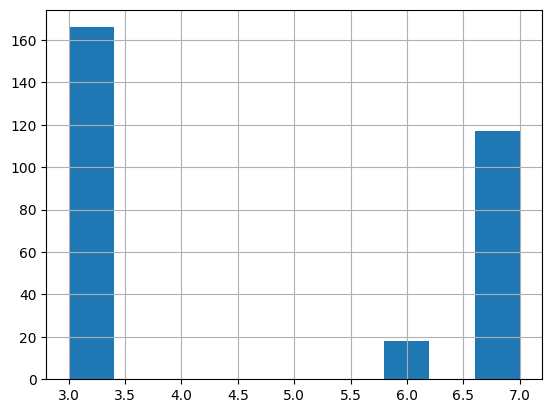

In [9]:
ca_mean = int(math.ceil(X['ca'].mean()))
print(f"ca_mean: {ca_mean}")
X['ca'].fillna(ca_mean, inplace=True)

thal_mean = X['thal'].mean()
print(f"thal_mean: {thal_mean}")
X['thal'].hist()

In [46]:
null_rows = X[X.isnull().any(axis=1)]
# there are only 6 rows with null valeus
null_rows.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
87,53,0,3,128,216,0,2,115,0,0.0,1,0.0,NaN
266,52,1,4,128,204,1,0,156,1,1.0,2,0.0,NaN
